In [4]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os

Creo una lista in cui inserisco i nomi di ogni strumento presente nel dataset (tutte le classi) <br>
Dopo scrivo il percorso parziale ai dati di training

In [15]:
# Tutte le classi
instruments = ['cel', 'cla', 'flu', 'gac', 'gel', 'org', 'pia', 'sax', 'tru', 'vio', 'voi']
# Classi utilizzate
instruments_3_class= ['gel', 'pia', 'sax']
# Percorso al folder contenente il dataset completo
path = "canzoni-etichettate/IRMAS-TrainingData/"
# Percorso al folder contenente il dataset completo filtrato
path_hpf = "./canzoni-etichettate/highpass-filtered/"
# Percorso al folder contenente il dataset completo campionato
path_sampled = "./canzoni-etichettate/dataset-campionato/"
# Percorso al folder contenente le 3 classi che saranno utilizzate
path_3_class = "./canzoni-etichettate/3-classi/"

Verifico che tutti i file audio di training abbiano la stessa durata

In [11]:
# Inizializza un dizionario per tenere traccia delle durate e del numero di file con quella durata
from collections import Counter
duration_counts = Counter()

# Per ogni cartella nella directory corrente
for folder in os.listdir(path):
  if os.path.isdir(folder) and folder != "readme.txt":
    # Entra nella cartella
    folder_path = os.path.join('.', folder)
    for filename in os.listdir(folder_path):
      if filename.endswith(".wav"):
        # Carica il file audio
        file_path = os.path.join(folder_path, filename)
        try:
          y, sr = librosa.load(file_path)
          duration = librosa.get_duration(y=y, sr=sr)
          # Arrotonda la durata a un valore decimale fisso (ad esempio, due decimali)
          duration = round(duration, 2)
          # Aggiorna il contatore per la durata
          duration_counts[duration] += 1
          
        except Exception as e:
          print(f"Errore durante il caricamento di {file_path}: {e}")

# Stampa le durate e il numero di file con quella durata
for duration, count in duration_counts.items():
  print(f"Durata: {duration} secondi, Numero di file: {count}")

Per ogni strumento estraggo la prima traccia audio e la metto in un dizionario chiamato <b>example for instrument</b>,<br>per esplorarne le caratteristiche temporali e frequenziali

In [6]:
example_for_instrument = {}
for instrument in instruments_3_class:
    temp = os.listdir(path_3_class + instrument) 
    example_for_instrument[instrument] = instrument + "/" + temp[0]

Controllo che la frequenza di campionamento di ogni file sia di 44100hz (in questo caso il controllo è solo per i file di esempio)

In [17]:
# Carica un file audio 
for filename in example_for_instrument.values():
    y, sr = librosa.load(path + filename, sr=None)
    if sr != 44100:
        print("la frequenza di campionamento di " + filename + "è di" + sr)


Ascolto ogni traccia di esempio per verificarne la correttezza

In [21]:

# Permette di ascoltare 3 secondi di una canzone specificata con "path" + "filename" 
def ascolta(path, filename):
    from pydub import AudioSegment
    from pydub.playback import play
    # Carica un file audio
    audio = AudioSegment.from_file(path + filename)
    # Riproduce il file audio
    play(audio)
    
for filename in example_for_instrument.values():
   ascolta(path_3_class, filename)

Input #0, wav, from '/var/folders/kj/vbqxjv1j2713w5spdqgfht040000gn/T/tmpfym8yc2c.wav':
  Duration: 00:00:03.00, bitrate: 1411 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 44100 Hz, 2 channels, s16, 1411 kb/s


Input #0, wav, from '/var/folders/kj/vbqxjv1j2713w5spdqgfht040000gn/T/tmpatu0l0cv.wav':
  Duration: 00:00:03.00, bitrate: 1411 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 44100 Hz, 2 channels, s16, 1411 kb/s


Input #0, wav, from '/var/folders/kj/vbqxjv1j2713w5spdqgfht040000gn/T/tmpnpswzgb3.wav':
  Duration: 00:00:03.00, bitrate: 1411 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 44100 Hz, 2 channels, s16, 1411 kb/s


Viene campionato il dataset, prediligendo la rimozione delle tracce prese dalle stesse canzoni

In [ ]:
import os
import re

# Siccome le tracce sono numerate con 1, 2 e 3 se sono state prese dalla stessa canzone,
# vengono separate per dare priorità a tracce diverse
pattern = r'^(.+)__(?:(1)|(2)|(3)).wav$'

# Calcola il numero di campioni per ogni classe
def campioni_per_folder(path):
    numero_file = {}
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        
        # Controlla che si tratta di una folder
        if os.path.isdir(folder_path) and folder != "readme.txt":
            numero_file[folder] = len(os.listdir(folder_path))

    return numero_file

numero_file = campioni_per_folder(path)
# Viene presa la classe con il minor numero di campioni, che sarà il numero al quale
# le altre classi dovranno uniformarsi
numero_file_max = min(numero_file)
print(numero_file)

'''
# numero_file è stato cambiato da lista a dizionario, la funzione di seguito non è stata corretta
# perché la funzione per campionare non è stata più utilizzata

# Itera nei folder della directory principale
for folder in os.listdir(path_campionati):
    folder_path = os.path.join(path_campionati, folder)
    
    # Controlla che si tratta di un folder
    if os.path.isdir(folder_path) and folder != "readme.txt":
        
        in_piu = len(os.listdir(folder_path)) - numero_file_max

        # Itera in ogni folder
        for filename in os.listdir(folder_path):
            if filename.endswith(".wav"):
                match = re.match(pattern, filename)
                
                if match.group(4) and in_piu > 0:
                    os.remove(folder_path + "/" + filename)
                    in_piu -= 1
'''

In [25]:
campioni_per_folder(path_3_class)

{'pia': 721, 'sax': 626, 'gel': 760}

Filtro le tracce di esempio per vedere se il risultato viene più pulito

In [81]:
import numpy as np
import librosa
import scipy.signal
import soundfile as sf
import matplotlib.pyplot as plt
# Definisci il percorso base (aggiorna questo con il percorso corretto)
#path_sampled = "./canzoni-etichettate/dataset-campionato/"

# 1. Carica il file audio
for folder in os.listdir(path_sampled):
    folder_path = os.path.join(path_sampled, folder)
    
    # Check if it's a directory and not a specific file
    if os.path.isdir(folder_path) and folder != "readme.txt":
        for file_path in os.listdir(folder_path):
            if file_path.endswith(".wav"):
                # Carica il file audio
                y, sr = librosa.load(os.path.join(folder_path, file_path), sr=None)
                
                # 2. Imposta la frequenza di Nyquist e la frequenza di taglio
                nyquist_freq = 0.5 * sr  # Frequenza di Nyquist
                cutoff_freq = 300  # Frequenza di taglio in Hz
                normal_cutoff = cutoff_freq / nyquist_freq  # Normalizzazione della frequenza di taglio

                # Crea il filtro passa-alto di Butterworth
                b, a = scipy.signal.butter(4, normal_cutoff, btype='high', analog=False)

                # 3. Applica il filtro al segnale audio
                y_filtered = scipy.signal.filtfilt(b, a, y)
                
                # 4. Verifica se la cartella di destinazione esiste, se no creala
                output_folder = "./canzoni-etichettate/highpass-filtered/"
                if not os.path.exists(output_folder):
                    os.makedirs(output_folder)
                
                # 5. Salva il risultato
                output_file_path = os.path.join(output_folder + folder, file_path)
                sf.write(output_file_path, y_filtered, sr)

Ascolto una traccia (casuale) per vedere come varia il risultato high-filtered

In [ ]:
ascolta(path, example_for_instrument["gel"])
ascolta(path_hpf, example_for_instrument["gel"])

Input #0, wav, from '/var/folders/kj/vbqxjv1j2713w5spdqgfht040000gn/T/tmpd4cfdj_6.wav':
  Duration: 00:00:03.00, bitrate: 1411 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 44100 Hz, 2 channels, s16, 1411 kb/s


Input #0, wav, from '/var/folders/kj/vbqxjv1j2713w5spdqgfht040000gn/T/tmpzlnwx5rj.wav':
  Duration: 00:00:03.00, bitrate: 705 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 44100 Hz, 1 channels, s16, 705 kb/s


Mostra il waveplot per ogni traccia di esempio


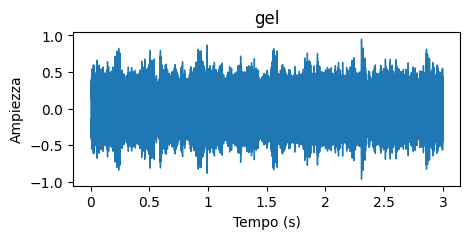

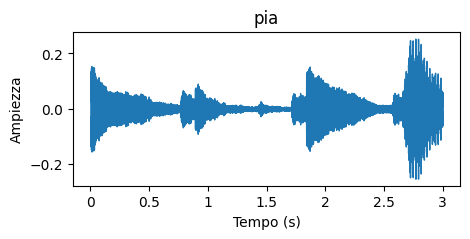

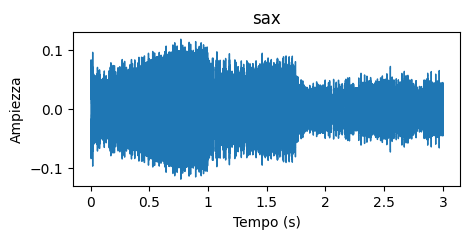

In [16]:
def waveplot(file_path):
    y, sr = librosa.load(file_path, sr=None)   
    plt.figure(figsize=(5, 2))
    librosa.display.waveshow(y, sr=sr)
    plt.title(instr[:3])
    plt.xlabel('Tempo (s)')
    plt.ylabel('Ampiezza')
    plt.show()

# Crea il waveplot per ogni strumento di prova
for instr in example_for_instrument.values(): 
    waveplot(path + instr)

Mostra Mel, CQT e chroma per ogni traccia di esempio

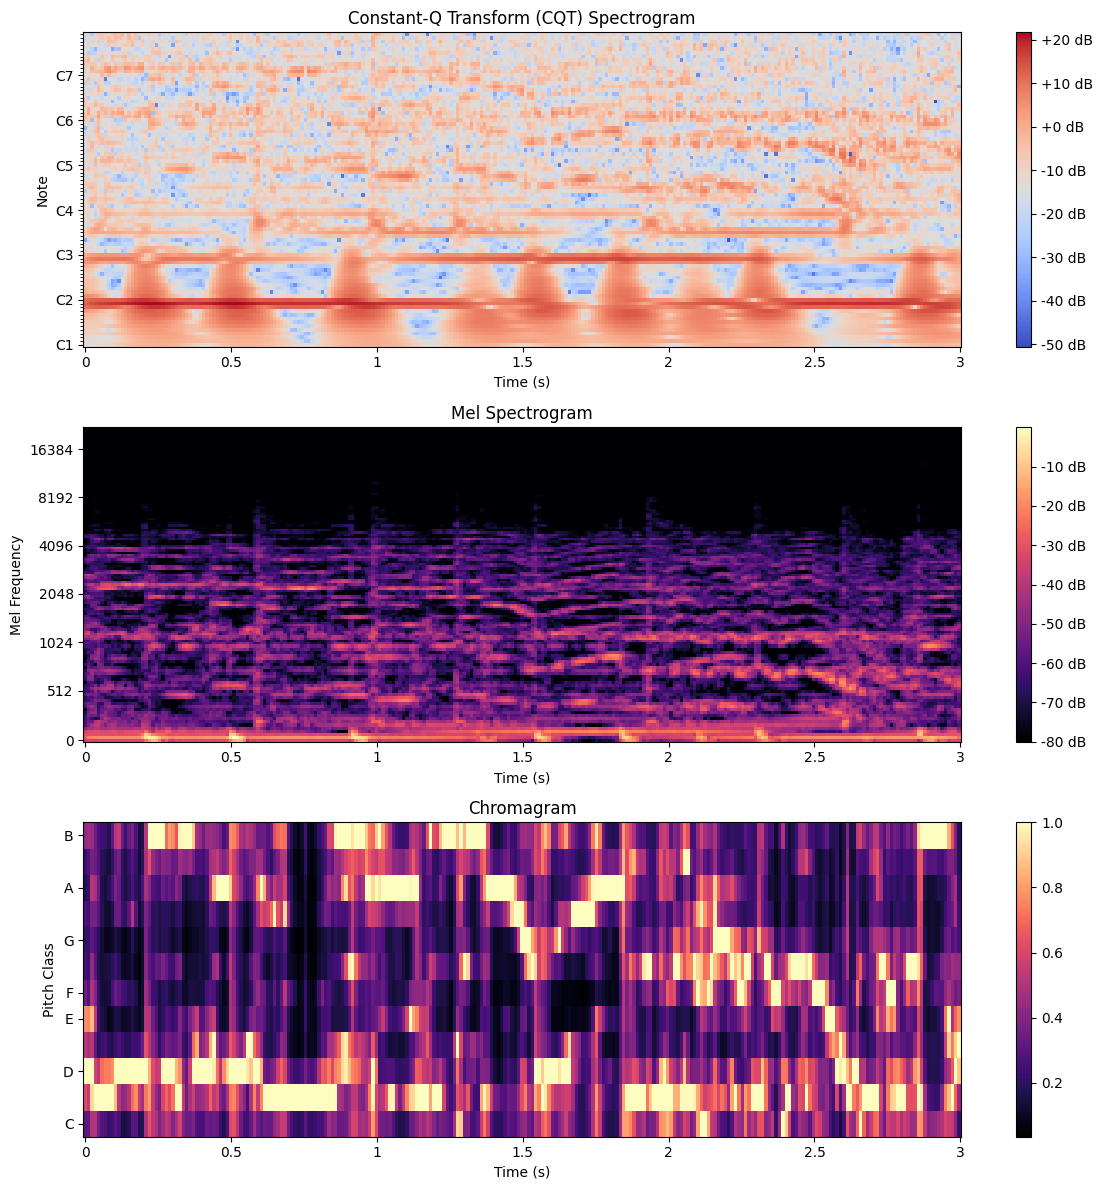

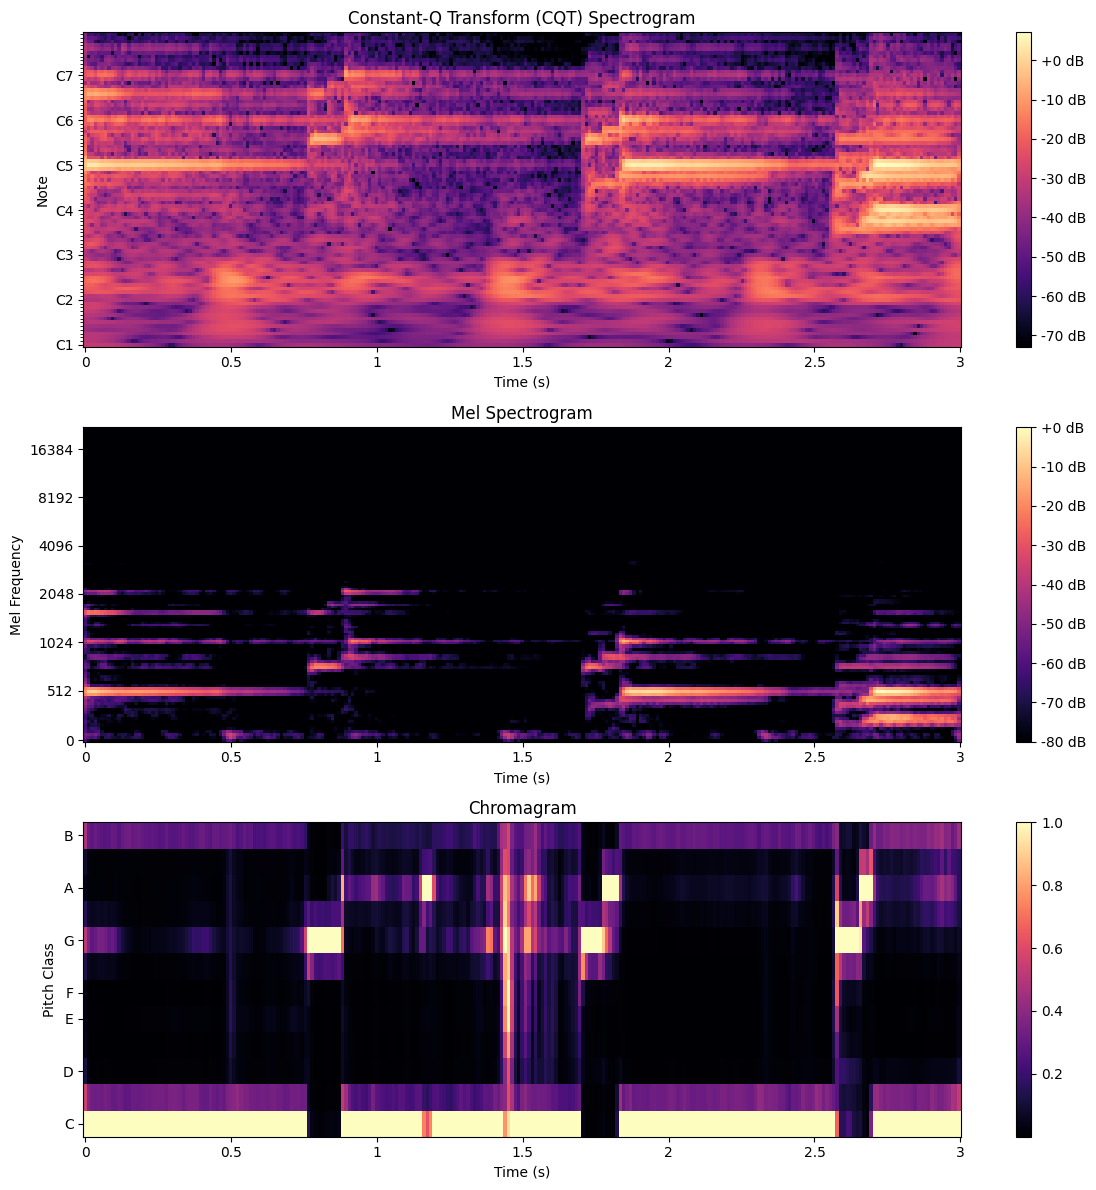

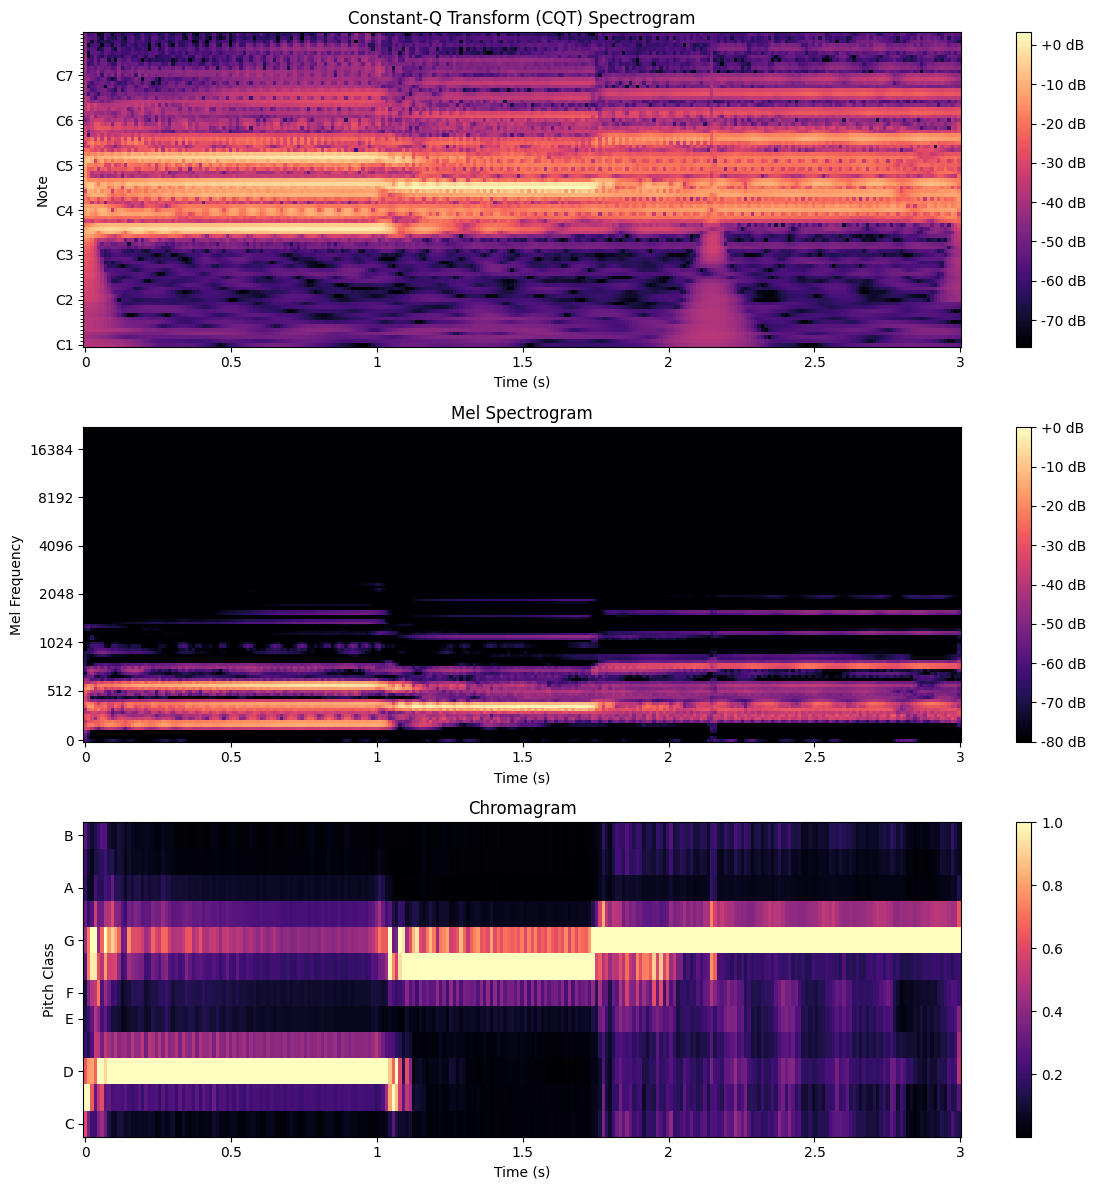

In [22]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

n_fft = 2048  # Dimensione della finestra FFT
hop_length = 512  # Passo della finestra
n_mels = 128  # Numero di bande Mel

def audio_to_spectrograms(file_path):
    # Carica il file audio
    y, sr = librosa.load(file_path, sr=None)
    
    # Calcola CQT
    C = librosa.cqt(y, sr=sr)
    C_db = librosa.amplitude_to_db(np.abs(C))
    
    # Calcola Mel-spettrogramma
    mel_spec = librosa.feature.melspectrogram(
        y=y, 
        sr=sr,
        n_fft=n_fft,
        hop_length=hop_length,
        n_mels=n_mels
    )
    mel_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
    
    # Calcola Cromagramma
    chroma = librosa.feature.chroma_stft(
        y=y, 
        sr=sr,
        n_fft=n_fft,
        hop_length=hop_length
    )
    
    # Ridimensiona la CQT alla stessa dimensione temporale del Mel-spettrogramma e del Chromagramma
    C_db = librosa.resample(C_db, orig_sr=C_db.shape[1], target_sr=mel_db.shape[1])
    
    return C_db, mel_db, chroma

def plot_spectrograms(C_db, mel_db, chroma, sr):
    # Crea una figura con tre subplot
    fig, axes = plt.subplots(3, 1, figsize=(12, 12))
    
    # Plot CQT
    img1 = librosa.display.specshow(
        C_db,
        sr=sr,
        hop_length=hop_length,
        x_axis='time',
        y_axis='cqt_note',
        ax=axes[0]
    )
    axes[0].set_title('Constant-Q Transform (CQT) Spectrogram')
    axes[0].set_xlabel('Time (s)')
    axes[0].set_ylabel('Note')
    fig.colorbar(img1, ax=axes[0], format='%+2.0f dB')
    
    # Plot Mel-spettrogramma
    img2 = librosa.display.specshow(
        mel_db,
        sr=sr,
        hop_length=hop_length,
        x_axis='time',
        y_axis='mel',
        ax=axes[1]
    )
    axes[1].set_title('Mel Spectrogram')
    axes[1].set_xlabel('Time (s)')
    axes[1].set_ylabel('Mel Frequency')
    fig.colorbar(img2, ax=axes[1], format='%+2.0f dB')
    
    # Plot Cromagramma
    img3 = librosa.display.specshow(
        chroma,
        sr=sr,
        hop_length=hop_length,
        x_axis='time',
        y_axis='chroma',
        ax=axes[2]
    )
    axes[2].set_title('Chromagram')
    axes[2].set_xlabel('Time (s)')
    axes[2].set_ylabel('Pitch Class')
    fig.colorbar(img3, ax=axes[2])
    
    # Aggiusta il layout
    plt.tight_layout()
    plt.show()

# Uso del codice
for filename in example_for_instrument.values():
    C_db, mel_db, chroma = audio_to_spectrograms(path_3_class + filename)
    plot_spectrograms(C_db, mel_db, chroma, sr)

In [26]:
example_for_instrument.values()

dict_values(['gel/137__[gel][dru][pop_roc]0940__1.wav', 'pia/[pia][cla]1346__3.wav', 'sax/224__[sax][nod][cla]1668__2.wav'])

Plotta lo spettrogramma ad un istante fissato di tempo per vederne le frequenze

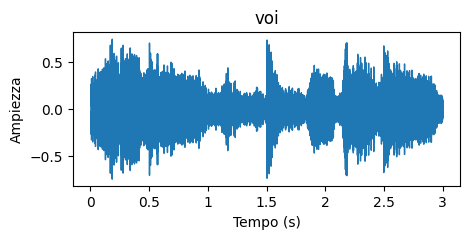

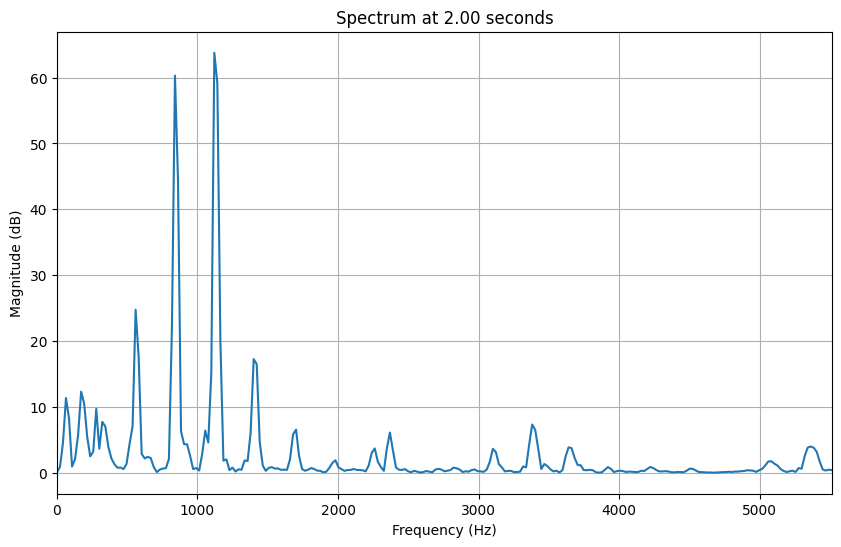

In [10]:
# Funzione ausiliaria, per osservare il contenuto in frequenza in un determinato istante e
# comprendere meglio il ruolo delle armoniche
def spettrogramma_istante_t(file_path, time_to_analyze):
    hop_length = 512  # Passo della finestra
    y, sr = librosa.load(file_path, sr=None)
    D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)

    # Converti l'istante temporale in indice della matrice dello spettrogramma
    frame_to_analyze = int(time_to_analyze * sr / hop_length)

    # Estrai il contenuto in frequenza a quel particolare istante
    spectrum_at_instant = np.abs(D[:, frame_to_analyze])
    frequencies = np.fft.fftfreq(n_fft, 1/sr)[:n_fft//2]

    plt.figure(figsize=(10, 6))
    plt.plot(frequencies, spectrum_at_instant[:n_fft//2])
    plt.title(f'Spectrum at {time_to_analyze:.2f} seconds')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.xlim(0, sr / 8)
    plt.grid()
    plt.show()